## NLP Project

### Staring with downloading requried libaries and uploading the dataset

In [1]:
# Install required libraries
!pip install nltk

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import ast
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/NLP-Project/resume_data.csv'

In [5]:
# Load the dataset
df = pd.read_csv(path)

y = df.iloc[:, -1].values   # Last column

# Display the first few rows
df.head()

,career_objective,skills,educational_institution_name,degree_names,passing_years,major_field_of_studies,professional_company_names,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,certification_providers,certification_skills,job_position_name,job_category
0,NaN,"['R', 'Python', 'Tableau', 'Power BI', 'SQL', ...",['NARSEE MONJEE INSTITUTE'],['BCA'],['2020'],['N/A'],['DENA FUNDS'],['APR 2020'],['TILL DATE'],"[['predictive data analysis', 'large scale dat...",['BUSINESS ANALYST'],['N/A'],Administrative Support\nScheduling\nFiling & D...,['N/A'],[None],Asst. Manager/ Manger (Administrative),Business Management
1,NaN,"['streamline', 'approach', 'balance sheet', 'b...",['McCallum Graduate School at Bentley Universi...,"[""Master's in Finance"", 'Bachelor of Science']","['December 2012', 'May 2011']","['Finance', 'Economics & Finance']","['PainQx', 'LSN', 'Abpro']","['01/2016', '06/2012', '02/2011']","['Current', '01/2016', '07/2012']","[['business development', 'CRM', 'financials',...","['VP of Business Development', 'Co-Founder VP ...","['City, State', 'City, State', 'City, State']",Administrative Support\nScheduling\nFiling & D...,NaN,NaN,Asst. Manager/ Manger (Administrative),Business Management
2,"A curiosity-driven data scientist, eager to le...","['Data Analysis', 'Machine learning', 'Data Mi...","['MamCO University', 'MamCO University']","['BSc(CA)', 'MSc(CA)']","['2018', '2020']","['Computer Applications', 'Computer Applicatio...",['KPMMC Inc.'],['Aug 2020'],['Ongoing'],"[['Natural Language Processing', 'Python', 'Ma...",['Machine Learning Junior Developer'],['N/A'],Administrative Support\nScheduling\nFiling & D...,['N/A'],"[['Big Data Analysis', 'Hadoop']]",Asst. Manager/ Manger (Administrative),Business Management
3,To pursue excellence in the dynamic business w...,"['3d', 'accounting', 'Accountant', 'Accounts r...","['Vidyasagar University', 'Mohan Lal Sukhadia ...","['MBA', 'N/A']","['2006', '2000']","['Finance', 'N/A']","['Company Name', 'Company Name', 'Auto1 (Al-Gh...","['October 2011', 'January 2009', 'August 2007'...","['August 2015', 'September 2011', 'December 20...","[['accounting'], ['accounting'], ['Accounting'...","['Accountant', 'Accountant', 'Accountant', 'Ac...","['City, State', 'City, State', 'Kuwait', 'City...",Administrative Support\nScheduling\nFiling & D...,NaN,NaN,Asst. Manager/ Manger (Administrative),Business Management
4,NaN,"['QA Engineering software expertise - Design, ...","['Devi Ahilya University', 'Devi Ahilya Univer...","['Master of Computer Applications (MCA)', 'Bac...","['2005', '2002']","['Computer Applications, Software Engineering,...","['Company Name', 'Company Name', 'Company Name']","['01/2016', '04/2015', '09/2005']","['Current', '01/2016', '04/2015']","[None, None, None]","['QA Engineering Manager', 'Software Certifica...","['City , State', 'City , State', 'City , State']",Administrative Support\nScheduling\nFiling & D...,"['Certified Scrum Master (CSM)', 'Certified Te...","[None, None, None, ['Python'], ['Python: XML, ...",Asst. Manager/ Manger (Administrative),Business Management


### Cleaning the data so that all of the empty field are replaced with NaN

In [6]:
# Function to fix lists: turn ['N/A'], ['None'] etc. → np.nan
def clean_list_field(cell):
    try:
        if isinstance(cell, str) and cell.startswith('['):
            parsed = ast.literal_eval(cell)
            if isinstance(parsed, list):
                cleaned = [item for item in parsed if str(item).strip().lower() not in ['n/a', 'none', 'nan']]
                return cleaned if cleaned else np.nan
        return cell
    except Exception:
        return np.nan

# Apply cleaning function to each relevant column
for col in df.columns:
      df[col] = df[col].apply(clean_list_field)

# Coverting all of the list into single string
for col in df.columns:
      df[col] = df[col].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Display cleaned and flattened data
df.head()


,career_objective,skills,educational_institution_name,degree_names,passing_years,major_field_of_studies,professional_company_names,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,certification_providers,certification_skills,job_position_name,job_category
0,NaN,R Python Tableau Power BI SQL SAS Deep Learnin...,NARSEE MONJEE INSTITUTE,BCA,2020,NaN,DENA FUNDS,APR 2020,TILL DATE,"['predictive data analysis', 'large scale data...",BUSINESS ANALYST,NaN,Administrative Support\nScheduling\nFiling & D...,NaN,NaN,Asst. Manager/ Manger (Administrative),Business Management
1,NaN,streamline approach balance sheet bonds budget...,McCallum Graduate School at Bentley University...,Master's in Finance Bachelor of Science,December 2012 May 2011,Finance Economics & Finance,PainQx LSN Abpro,01/2016 06/2012 02/2011,Current 01/2016 07/2012,"['business development', 'CRM', 'financials', ...",VP of Business Development Co-Founder VP of Bu...,"City, State City, State City, State",Administrative Support\nScheduling\nFiling & D...,NaN,NaN,Asst. Manager/ Manger (Administrative),Business Management
2,"A curiosity-driven data scientist, eager to le...",Data Analysis Machine learning Data Mining Nat...,MamCO University MamCO University,BSc(CA) MSc(CA),2018 2020,Computer Applications Computer Applications,KPMMC Inc.,Aug 2020,Ongoing,"['Natural Language Processing', 'Python', 'Mac...",Machine Learning Junior Developer,NaN,Administrative Support\nScheduling\nFiling & D...,NaN,"['Big Data Analysis', 'Hadoop']",Asst. Manager/ Manger (Administrative),Business Management
3,To pursue excellence in the dynamic business w...,3d accounting Accountant Accounts receivables ...,Vidyasagar University Mohan Lal Sukhadia Unive...,MBA,2006 2000,Finance,Company Name Company Name Auto1 (Al-Ghannam Au...,October 2011 January 2009 August 2007 April 20...,August 2015 September 2011 December 2008 May 2...,"['accounting'] ['accounting'] ['Accounting', '...",Accountant Accountant Accountant Accountant Ac...,"City, State City, State Kuwait City, State Cit...",Administrative Support\nScheduling\nFiling & D...,NaN,NaN,Asst. Manager/ Manger (Administrative),Business Management
4,NaN,"QA Engineering software expertise - Design, Es...",Devi Ahilya University Devi Ahilya University,Master of Computer Applications (MCA) Bachelor...,2005 2002,"Computer Applications, Software Engineering, D...",Company Name Company Name Company Name,01/2016 04/2015 09/2005,Current 01/2016 04/2015,NaN,QA Engineering Manager Software Certification ...,"City , State City , State City , State",Administrative Support\nScheduling\nFiling & D...,Certified Scrum Master (CSM) Certified Tester ...,"['Python'] ['Python: XML, JSON, and the Web'] ...",Asst. Manager/ Manger (Administrative),Business Management


In [7]:
df[2:3]

,career_objective,skills,educational_institution_name,degree_names,passing_years,major_field_of_studies,professional_company_names,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,certification_providers,certification_skills,job_position_name,job_category
2,"A curiosity-driven data scientist, eager to le...",Data Analysis Machine learning Data Mining Nat...,MamCO University MamCO University,BSc(CA) MSc(CA),2018 2020,Computer Applications Computer Applications,KPMMC Inc.,Aug 2020,Ongoing,"['Natural Language Processing', 'Python', 'Mac...",Machine Learning Junior Developer,NaN,Administrative Support\nScheduling\nFiling & D...,NaN,"['Big Data Analysis', 'Hadoop']",Asst. Manager/ Manger (Administrative),Business Management


### 1. Preparing the Dataset for Job Category Prediction
In this section, we are preparing our structured resume dataset for a classification task where the goal is to predict the job category that best fits each candidate based on their resume content.

Our dataset already contains extracted fields like skills, degrees, previous positions, and certifications. Instead of working with raw resume text, we are using these structured fields as inputs to our model.

Here’s what we’re doing:

1. Select key resume sections (features) that are most relevant for predicting job roles (e.g., skills, degree_names, positions, etc.). We already picked out the features and updated our dataset with them.

2. Use CountVectorizer() separately for each text-based column to transform the selected resume fields into numerical feature vectors. This will treat each column as a bag-of-words and converts it into a matrix of token counts. After vectorizing each feature column, we concatenate all the resulting matrices horizontally into a single input feature matrix for modeling.

3. Encode the job categories into numeric labels using LabelEncoder.

4. Split the dataset into training and testing sets, so we can evaluate our model’s performance later.

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Select all columns except the last two
X_df = df.drop(columns=["job_category", "job_position_name"], errors="ignore").copy()

# Convert all feature columns to string (for CountVectorizer)
X_df = X_df.astype(str)

# 2. Initialize vectorizers and transformed arrays
vectorizers = {}
vectors = []

# Apply CountVectorizer to each feature column
for col in X_df.columns:
    # Ensure column isn't completely empty or just whitespace
    if X_df[col].str.strip().eq('').all():
        print(f"Skipping column '{col}' — all entries are empty after cleaning.")
        continue

    try:
        vec = CountVectorizer()
        X_col = vec.fit_transform(X_df[col])
        if not vec.vocabulary_:
            print(f"Skipping column '{col}' — vocabulary is empty.")
            continue
        vectorizers[col] = vec
        vectors.append(X_col.toarray())
    except ValueError as e:
        print(f"Skipping column '{col}' due to ValueError: {e}")


# Concatenate all vectors horizontally
X = np.concatenate(vectors, axis=1)

# 3. Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['job_category'])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_df.head()

,career_objective,skills,educational_institution_name,degree_names,passing_years,major_field_of_studies,professional_company_names,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,certification_providers,certification_skills
0,nan,R Python Tableau Power BI SQL SAS Deep Learnin...,NARSEE MONJEE INSTITUTE,BCA,2020,nan,DENA FUNDS,APR 2020,TILL DATE,"['predictive data analysis', 'large scale data...",BUSINESS ANALYST,nan,Administrative Support\nScheduling\nFiling & D...,nan,nan
1,nan,streamline approach balance sheet bonds budget...,McCallum Graduate School at Bentley University...,Master's in Finance Bachelor of Science,December 2012 May 2011,Finance Economics & Finance,PainQx LSN Abpro,01/2016 06/2012 02/2011,Current 01/2016 07/2012,"['business development', 'CRM', 'financials', ...",VP of Business Development Co-Founder VP of Bu...,"City, State City, State City, State",Administrative Support\nScheduling\nFiling & D...,nan,nan
2,"A curiosity-driven data scientist, eager to le...",Data Analysis Machine learning Data Mining Nat...,MamCO University MamCO University,BSc(CA) MSc(CA),2018 2020,Computer Applications Computer Applications,KPMMC Inc.,Aug 2020,Ongoing,"['Natural Language Processing', 'Python', 'Mac...",Machine Learning Junior Developer,nan,Administrative Support\nScheduling\nFiling & D...,nan,"['Big Data Analysis', 'Hadoop']"
3,To pursue excellence in the dynamic business w...,3d accounting Accountant Accounts receivables ...,Vidyasagar University Mohan Lal Sukhadia Unive...,MBA,2006 2000,Finance,Company Name Company Name Auto1 (Al-Ghannam Au...,October 2011 January 2009 August 2007 April 20...,August 2015 September 2011 December 2008 May 2...,"['accounting'] ['accounting'] ['Accounting', '...",Accountant Accountant Accountant Accountant Ac...,"City, State City, State Kuwait City, State Cit...",Administrative Support\nScheduling\nFiling & D...,nan,nan
4,nan,"QA Engineering software expertise - Design, Es...",Devi Ahilya University Devi Ahilya University,Master of Computer Applications (MCA) Bachelor...,2005 2002,"Computer Applications, Software Engineering, D...",Company Name Company Name Company Name,01/2016 04/2015 09/2005,Current 01/2016 04/2015,nan,QA Engineering Manager Software Certification ...,"City , State City , State City , State",Administrative Support\nScheduling\nFiling & D...,Certified Scrum Master (CSM) Certified Tester ...,"['Python'] ['Python: XML, JSON, and the Web'] ..."


In [10]:
# Sum token counts across all feature columns
tokens_per_sample = np.sum(X, axis=1)

# Summary stats
print("Average tokens per sample:", np.mean(tokens_per_sample))
print("Min tokens per sample:", np.min(tokens_per_sample))
print("Max tokens per sample:", np.max(tokens_per_sample))


Average tokens per sample: 139.60689402273562
Min tokens per sample: 37
Max tokens per sample: 526


In [11]:
from sklearn.preprocessing import LabelEncoder

# Assume this is already defined
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['job_category'])

# Print category → encoded value mapping
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")


Business Management: 0
Civil and Mechanical Engineering: 1
HR & Marketing: 2
Software & IT: 3
Tech Engineering: 4


## 2. Baseline Classification
We will evaluate three simple strategies using 5-fold cross-validation:

- **most_frequent**: always predict the most common class
- **stratified**: predict randomly according to class distribution
- **uniform**: predict randomly with equal chance for each class


In [ ]:
# Count how many samples exist for each job category
category_counts = df['job_category'].value_counts()

# Display the counts
print("Number of samples per job category:\n")
print(category_counts)


Number of samples per job category:

job_category
Software & IT                       2384
Civil and Mechanical Engineering    1708
Tech Engineering                    1701
Business Management                 1364
HR & Marketing                      1024
Name: count, dtype: int64


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Create scorers for multiclass
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0)
}

# Run dummy classifiers
for strategy in ["most_frequent", "stratified", "uniform"]:
    print(f"\n--- Strategy: {strategy} ---")
    dummy = DummyClassifier(strategy=strategy, random_state=42)
    scores = cross_validate(dummy, X, y, cv=5, scoring=scoring_metrics)

    # Print average results
    for metric in scoring_metrics:
        print(f"{metric}: {scores['test_' + metric].mean():.4f}")



--- Strategy: most_frequent ---
accuracy: 0.2914
precision: 0.0583
recall: 0.2000
f1: 0.0903

--- Strategy: stratified ---
accuracy: 0.2233
precision: 0.2088
recall: 0.2087
f1: 0.2086

--- Strategy: uniform ---
accuracy: 0.2056
precision: 0.2058
recall: 0.2081
f1: 0.2029


## 3. Naive Bayes Classification

Here, we decided to use Multinomial Naive Bayes because it works well with discrete data, such as word counts or term frequencies. We continue to use 5-fold cross validation, but here we will print out the results separately for each fold.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Initialize the classifier
mnb = MultinomialNB()

# Run 5-fold cross-validation
nb_scores = cross_validate(mnb, X, y, cv=5, scoring=scoring_metrics, return_train_score=False)

# Print individual fold results
print("Multinomial Naive Bayes (Bag-of-Words) Performance (each fold):")
for metric in scoring_metrics.keys():
    print(f"{metric}: {nb_scores['test_' + metric]}")

# Print average scores
print("\nMultinomial Naive Bayes (Bag-of-Words) Average Performance:")
for metric in scoring_metrics.keys():
    mean_score = nb_scores['test_' + metric].mean()
    print(f"{metric}: {mean_score:.4f}")


Multinomial Naive Bayes (Bag-of-Words) Performance (each fold):
accuracy: [0.78497251 0.7891198  0.79339853 0.92787286 0.99694377]
precision: [0.86649498 0.87718919 0.89354819 0.95848628 0.9952381 ]
recall: [0.85038352 0.7981112  0.85748535 0.93061282 0.99757255]
f1: [0.79072597 0.71877768 0.82168141 0.93550547 0.99637294]

Multinomial Naive Bayes (Bag-of-Words) Average Performance:
accuracy: 0.8585
precision: 0.9182
recall: 0.8868
f1: 0.8526


## 4. Statistical Classification: Logistic Regression and Linear SVC

In this step, we will evaluate two common statistical models — Logistic Regression and Linear Support Vector Classifier (SVC) — to predict a candidate's job category using structured resume data. We continue to use 5-fold cross validation.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# --- Logistic Regression ---
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000)
log_scores = cross_validate(log_reg, X, y, cv=5, scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f"{metric}: {log_scores['test_' + metric].mean():.4f}")

# --- Linear SVC ---
print("\n--- Linear SVC ---")
svc = LinearSVC(max_iter=10000)
svc_scores = cross_validate(svc, X, y, cv=5, scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f"{metric}: {svc_scores['test_' + metric].mean():.4f}")



--- Logistic Regression ---
accuracy: 0.8269
precision: 0.8739
recall: 0.8567
f1: 0.8165

--- Linear SVC ---
accuracy: 0.7918
precision: 0.8589
recall: 0.8231
f1: 0.7681


## 5. Neural Classification with Feed Forward Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- FFNN ---
print("\n--- FFNN ---")
ffnn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64, 32, 16, 8, 4), random_state=1)
ffnn.fit(X_train, y_train)

ffnn_scores = cross_validate(ffnn, X, y, cv=5, scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f"{metric}: {ffnn_scores['test_' + metric].mean():.4f}")


--- FFNN ---
accuracy: 0.7436
precision: 0.7913
recall: 0.7766
f1: 0.7324


## 6. Statistical Approaches with Word2Vec

To improve the semantic understanding of text in resume fields (like Skills, Education, Certifications), we will use pre trained Word2Vec embeddings. These embeddings help capture the meaning and similarity between words — for example, "Python" and "Java" will be closer in the vector space than unrelated terms. Instead of sparse word counts, this gives us rich numerical representations.

In [12]:
!wget https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz

--2025-05-09 03:32:32--  https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2025-05-09 03:32:32--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vecto

In [14]:
!pip uninstall -y numpy gensim
!pip install numpy==1.26.4
!pip install gensim==4.3.3


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


Restart session for gensim

In [12]:
!pip install gensim
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [12]:
# Step 3: Import libraries again
import gensim
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler


In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from gensim.utils import simple_preprocess

# Define scoring
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0)
}

# Combine text if needed
if 'text' not in df.columns:
    df['text'] = X_df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['tokens'] = df['text'].apply(simple_preprocess)

# Load Word2Vec
bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)

# Create averaged vectors
def get_avg_w2v(text):
    tokens = str(text).split()
    vectors = [bigmodel[word] for word in tokens if word in bigmodel]
    if len(vectors) == 0:
        return np.zeros(300)
    return np.mean(vectors, axis=0)

X_vectors = np.vstack(df['tokens'].apply(lambda tokens: get_avg_w2v(" ".join(tokens))).values)
X_scaled = StandardScaler().fit_transform(X_vectors)

# === Logistic Regression ===
clf_log = LogisticRegression(max_iter=1000)
scores_log = cross_validate(clf_log, X_scaled, y, cv=5, scoring=scoring_metrics)
print("--- Logistic Regression ---")
for metric in scoring_metrics:
    print(f"{metric}: {scores_log['test_' + metric].mean():.4f}")

# === Gaussian Naive Bayes ===
clf_nb = GaussianNB()
scores_nb = cross_validate(clf_nb, X_scaled, y, cv=5, scoring=scoring_metrics)
print("\n--- Gaussian Naive Bayes ---")
for metric in scoring_metrics:
    print(f"{metric}: {scores_nb['test_' + metric].mean():.4f}")

# === SVM ===
clf_svm = SVC(kernel='linear', class_weight='balanced')
scores_svm = cross_validate(clf_svm, X_scaled, y, cv=5, scoring=scoring_metrics)
print("\n--- SVM (linear kernel) ---")
for metric in scoring_metrics:
    print(f"{metric}: {scores_svm['test_' + metric].mean():.4f}")

# === LinearSVC ===
clf_linsvc = LinearSVC(max_iter=10000, class_weight='balanced')
scores_linsvc = cross_validate(clf_linsvc, X_scaled, y, cv=5, scoring=scoring_metrics)
print("\n--- LinearSVC ---")
for metric in scoring_metrics:
    print(f"{metric}: {scores_linsvc['test_' + metric].mean():.4f}")


--- Logistic Regression ---
accuracy: 0.7185
precision: 0.7452
recall: 0.7512
f1: 0.7032

--- Gaussian Naive Bayes ---
accuracy: 0.4014
precision: 0.3914
recall: 0.4008
f1: 0.3846

--- SVM (linear kernel) ---
accuracy: 0.6711
precision: 0.6878
recall: 0.7050
f1: 0.6521

--- LinearSVC ---
accuracy: 0.7158
precision: 0.7401
recall: 0.7502
f1: 0.6960


## 7. Neural Approaches with Word2Vec (MLP Classifier)

In [12]:
!pip install tensorflow

### Setting up Word2Vec Embeddings

In [13]:
import gensim.downloader as api
from gensim.utils import simple_preprocess

# Combine selected resume fields into a single text column
df['text'] = X_df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Tokenize and clean text using gensim
df['tokens'] = df['text'].apply(simple_preprocess)

# Load pretrained Word2Vec model
word2vec = api.load('word2vec-google-news-300')

# Get document-level embeddings (average of word vectors)
def get_doc_vector(tokens, model):
    vectors = [model[token] for token in tokens if token in model]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df['vectors'] = df['tokens'].apply(lambda x: get_doc_vector(x, word2vec))


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [14]:
from sklearn.model_selection import train_test_split

X_w2v = np.vstack(df['vectors'].values)
y_w2v = y  # Reuse label-encoded job categories

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y_w2v, test_size=0.2, random_state=42)


### Feedforward Neural Network (FFNN)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import numpy as np

# Define the FFNN architecture
ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(300,)),  # Input layer (300-dim Word2Vec)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer: softmax for multiclass
])

# Compile model
ffnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_w2v), y=y_train_w2v)
class_weight_dict = dict(enumerate(class_weights))

# Train the model
ffnn.fit(
    X_train_w2v, y_train_w2v,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

# Predict and evaluate
pred_probs = ffnn.predict(X_test_w2v)
pred_ffnn = np.argmax(pred_probs, axis=1)

print("FFNN Classification Report:")
print(classification_report(y_test_w2v, pred_ffnn, target_names=label_encoder.classes_, zero_division=0))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3297 - loss: 1.5597 - val_accuracy: 0.6112 - val_loss: 1.2779
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5626 - loss: 1.2099 - val_accuracy: 0.7655 - val_loss: 0.7954
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7123 - loss: 0.8412 - val_accuracy: 0.8541 - val_loss: 0.5543
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7995 - loss: 0.6049 - val_accuracy: 0.8648 - val_loss: 0.4303
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8462 - loss: 0.4659 - val_accuracy: 0.8908 - val_loss: 0.3250
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8717 - loss: 0.3847 - val_accuracy: 0.9206 - val_loss: 0.2775
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.3233 - val_accuracy: 0.9106 - val_loss: 0.2679
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9029 - loss: 0.2827 - val_accuracy: 

### Convolutional Neural Network (CNN)

In [19]:
from tensorflow.keras.models import Sequential

# Define padding length and embedding size
max_length = 100
dimension = 300
num_classes = len(np.unique(y))  # Multiclass setup

# Prepare input sequences
row_matrix = []
for tokens in df['tokens']:
    matrix = [word2vec[token] for token in tokens if token in word2vec]
    if not matrix:
        matrix = [np.zeros(dimension)]
    padded = pad_sequences([matrix], maxlen=max_length, dtype='float32', padding='post', truncating='post')[0]
    row_matrix.append(padded)


In [29]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

x_cnn = np.array(row_matrix)

# Split the data
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(x_cnn, y, test_size=0.2, random_state=42)

# Build multiclass CNN
cnn = Sequential([
    Conv1D(128, kernel_size=5, activation='relu', input_shape=(max_length, dimension)),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # ✅ Multiclass output
])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_cnn), y=y_train_cnn)
class_weight_dict = dict(enumerate(class_weights))

# Compile
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
cnn.fit(
    x_train_cnn, y_train_cnn,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

# Predict and evaluate
pred_probs_cnn = cnn.predict(x_test_cnn)
pred_cnn = np.argmax(pred_probs_cnn, axis=1)

print("CNN Classification Report:")
print(classification_report(y_test_cnn, pred_cnn, target_names=label_encoder.classes_, zero_division=0))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4337 - loss: 1.3371 - val_accuracy: 0.6753 - val_loss: 0.7047
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6823 - loss: 0.7175 - val_accuracy: 0.6562 - val_loss: 0.6677
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.6987 - loss: 0.6585 - val_accuracy: 0.6746 - val_loss: 0.6512
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.7077 - loss: 0.6272 - val_accuracy: 0.6761 - val_loss: 0.6445
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.6980 - loss: 0.6407 - val_accuracy: 0.6814 - val_loss: 0.6359
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.6957 - loss: 0.6271 - val_accuracy: 0.7021 - val_loss: 0.6228
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.7234 - loss: 0.6029 - val_accuracy: 0.6998 - val_loss: 0.6210
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.7202 - loss: 0.6070 - 

### Bidirectional LSTM (RNN)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Input shape: (num_samples, max_length, 300)
# max_length and x_rnn are the same as used in your CNN code
x_rnn = np.array(row_matrix)
y_rnn = y      # reuse label-encoded job categories

# Train-test split
x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(x_rnn, y_rnn, test_size=0.2, random_state=42)

# Build the RNN model
rnn = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(max_length, dimension)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_rnn)), activation='softmax')  # Multiclass output
])

# Compile model
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_rnn), y=y_train_rnn)
class_weight_dict = dict(enumerate(class_weights))

# Train
rnn.fit(
    x_train_rnn, y_train_rnn,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

# Predict and evaluate
pred_probs_rnn = rnn.predict(x_test_rnn)
pred_rnn = np.argmax(pred_probs_rnn, axis=1)

# Classification report
print("RNN Classification Report:")
print(classification_report(y_test_rnn, pred_rnn, target_names=label_encoder.classes_, zero_division=0))

# Overall scores
precision = precision_score(y_test_rnn, pred_rnn, average='macro', zero_division=0)
recall = recall_score(y_test_rnn, pred_rnn, average='macro', zero_division=0)
f1 = f1_score(y_test_rnn, pred_rnn, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_rnn, pred_rnn)

print("RNN Model Performance (macro avg):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.2765 - loss: 1.5757 - val_accuracy: 0.4836 - val_loss: 1.1715
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.5085 - loss: 1.1268 - val_accuracy: 0.5600 - val_loss: 0.8754
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.5851 - loss: 0.9452 - val_accuracy: 0.4431 - val_loss: 1.3347
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.5643 - loss: 1.0556 - val_accuracy: 0.5615 - val_loss: 0.8553
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.4627 - loss: 1.1059 - val_accuracy: 0.2934 - val_loss: 1.4110
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 227ms/step - accuracy: 0.3403 - loss: 1.3233 - val_accuracy: 0.4828 - val_loss: 1.1022
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.5267 - loss: 1.0190 - val_accuracy: 0.6211 - val_loss: 0.8391
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 37s 201ms/step - accuracy: 0.6018 - loss: 0

## 8. Using BERT Embedding for Classification

In [ ]:
!pip install datasets
!pip install transformers
!pip install evaluate
!pip install numpy --upgrade

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

if 'text' in df.columns:
    df = df.drop(columns=['text'])

X_df = df.drop(columns=["job_position_name", "job_category", "label"], errors='ignore').copy()
df['text'] = X_df.apply(
    lambda row: ' '.join(
        str(val).replace('\n', ', ').strip()
        for val in row
        if pd.notna(val) and str(val).strip().lower() != 'nan'
    ),
    axis=1
)
df['text'] = df['text'].str.strip().str.replace(r'\s+', ' ', regex=True)

# STEP 2: Encode labels
df['label'] = pd.Categorical(df['job_category']).codes

# STEP 3: Use sklearn to split into train/test
df_train, df_test = train_test_split(df[['text', 'label']], test_size=0.2, random_state=34, stratify=df['label'])

# STEP 4: Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def preprocess_function(examples):
  return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_train = train_dataset.map(preprocess_function)
tokenized_test = test_dataset.map(preprocess_function)


Map:   0%|          | 0/6544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1637 [00:00<?, ? examples/s]

In [ ]:
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

for i in range(5):
    print("LABEL:", df['job_category'].iloc[i])
    print("TEXT:", df['text'].iloc[i])
    print("----")

# Check original label distribution
print(df['label'].value_counts())

# Convert to pandas for label distribution check
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()

# Check class distribution
print("Train label distribution:")
print(train_df['label'].value_counts())

print("\nTest label distribution:")
print(test_df['label'].value_counts())


Training set size: 6544
Test set size: 1637
LABEL: Business Management
TEXT: R Python Tableau Power BI SQL SAS Deep Learning Neural Networks Artificial Intelligence NARSEE MONJEE INSTITUTE BCA 2020 DENA FUNDS APR 2020 TILL DATE ['predictive data analysis', 'large scale data handling'] BUSINESS ANALYST Administrative Support, Scheduling, Filing & Documentation, Communication, Team Support, Equipment Maintenance, Information Provision, Inventory Management, Team Collaboration, OHS Policy Development, Safety Advice, Risk Assessment, Policy Review, OHS Training, Safety Inspections, Unsafe Act Prevention, Incident Investigation, Report Preparation
----
LABEL: Business Management
TEXT: streamline approach balance sheet bonds budgeting business development cash flow clinical research clinical trials com consulting corporate finance CRM database email English equities Fast financials financing financial fundraising funds graphical user interface information systems Innovation inventory marketi

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

num_labels = len(df['label'].unique())  # Or set(df['label'])
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DataCollatorWithPadding

# Collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from sklearn.metrics import classification_report
from evaluate import load

# Metrics
def compute_metrics(eval_pred):
   load_accuracy = load("accuracy")
   load_f1 = load("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels, average="macro")["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_resume_results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-58-32ac00ff8356>:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Step,Training Loss
500,0.251200
1000,0.021200
1500,0.019400
2000,0.019200


TrainOutput(global_step=2045, training_loss=0.07650034719108077, metrics={'train_runtime': 1382.8256, 'train_samples_per_second': 23.662, 'train_steps_per_second': 1.479, 'total_flos': 3730725768834720.0, 'train_loss': 0.07650034719108077, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.019936099648475647,
 'eval_accuracy': 0.9908368967623702,
 'eval_f1': 0.9918573652250698,
 'eval_runtime': 23.075,
 'eval_samples_per_second': 70.943,
 'eval_steps_per_second': 4.464,
 'epoch': 5.0}

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the tokenized test set
pred = trainer.predict(tokenized_test)
y_pred = np.argmax(pred.predictions, axis=-1)
y_true = pred.label_ids

# Generate classification report
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9890    0.9945       273
           1     1.0000    0.9912    0.9956       342
           2     1.0000    0.9902    0.9951       205
           3     0.9695    1.0000    0.9845       477
           4     1.0000    0.9794    0.9896       340

    accuracy                         0.9908      1637
   macro avg     0.9939    0.9900    0.9919      1637
weighted avg     0.9911    0.9908    0.9909      1637



## 9. LLMs for Few-Shot Learning or Embedding-Based Classification

Here, we will be using Mistral's LLM with both zero-shot and few-shot prompting

### Installing and Setting up Mistral API

In [13]:
pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 15.8 MB/s eta 0:00:00


In [14]:
from mistralai import Mistral

# Here is where you need to tell your code your mistral API key.
# If you skipped the intructions above, create an account and get one here:
# https://console.mistral.ai/home

client = Mistral(api_key="w6yh0tpXA6gK3p52Yt1vfzM8Yv74LkNX")

In [15]:
# This is the large latest LLM from Mistral.
# There are other models. You can find out about them here;
# https://docs.mistral.ai/getting-started/models/models_overview/
MODEL = "mistral-large-latest"

In [16]:
# Combine all text features into one "text" column
if 'text' in df.columns:
    df = df.drop(columns=['text'])

X_df = df.drop(columns=["job_position_name", "job_category", "label"], errors='ignore').copy()
df['text'] = X_df.apply(
    lambda row: ' '.join(
        str(val).replace('\n', ', ').strip()
        for val in row
        if pd.notna(val) and str(val).strip().lower() != 'nan'
    ),
    axis=1
)
df['text'] = df['text'].str.strip().str.replace(r'\s+', ' ', regex=True)

# STEP 2: Encode labels
df['label'] = pd.Categorical(df['job_category']).codes

# STEP 3: Use sklearn to split into train/test
df_train, df_test = train_test_split(df[['text', 'label']], test_size=0.2, random_state=34, stratify=df['label'])

In [17]:
# Sample 500 resumes
resume_sampled_df = df_test.sample(n=500, random_state=42).reset_index(drop=True)

# Extract labels
y_sampled = resume_sampled_df["label"].tolist()


### Zero Shot Prompting
In zero-shot prompting, we give the model only a basic instruction without any examples.

We prompt the model to classify each resume into one of the predefined job categories. This tests the model's generalization abilities based on your instructions alone.



In [ ]:
import time
import pandas as pd

# Store predictions
predictions = []

# Loop through the sampled resumes
for index, row in resume_sampled_df.iterrows():
    # Create the prompt using the text field from the current row
    prompt = (
        "Based on the following resume details, predict the job category from the following options:\n"
        "0: Business Management\n"
        "1: Civil and Mechanical Engineering\n"
        "2: HR & Marketing\n"
        "3: Software & IT\n"
        "4: Tech Engineering\n"
        f"Resume:\n{row['text']}\n"
        "Answer with only the integer corresponding to the category."
    )

    # Put it in MESSAGES format for Mistral
    MESSAGES = [{"role": "user", "content": prompt}]


    # Make the LLM request
    completion = client.chat.complete(
        model=MODEL,
        messages=MESSAGES
    )
    response = completion.choices[0].message.content.strip()

    # Print prompt and response
    print(f"Prompt:\n{prompt}")
    print(f"Prediction:\n{completion.choices[0].message.content}")

    # Save the response
    match = re.search(r"\b([0-4])\b", response)
    predictions.append(int(match.group(1)) if match else "ERROR")

    # Pause to avoid hitting Mistral rate limits
    time.sleep(5)


Streaming output truncated to the last 5000 lines.
3: Software & IT
4: Tech Engineering
Resume:
Financial Accountant specializing in financial planning, reporting and analysis in both private and public sectors. Capable Accountant successful at managing multiple projects and consistently meeting deadlines under pressure. Extensive knowledge of accounting software and processes. account reconciliations accounting accounts payable Accounts Receivable AP Balance sheet Bank Reconciliation Banking Billing book Com Client edit Finance Financials financial reports Preparing financial reports focus functional General Ledger GL Inventory control process invoices Invoice Processing invoicing MBA mail office Developer profit and loss statement coding reporting researching SAP FI SAP MBA B.Com Diploma Finance and IT Mgt Hons Computer Application Company Name Company Name Company Name January 2016 January 2016 March 2009 January 2016 January 2016 December 2012 ['Cash book maintenance', 'Bank Reconc

In [ ]:
from sklearn.metrics import classification_report

# Turn the predictions into integers
npredictions = [int(x) for x in predictions]

# print a classification report
print(classification_report(resume_sampled_df["label"], npredictions))

              precision    recall  f1-score   support

           0       0.16      0.20      0.18        82
           1       0.23      0.17      0.20        99
           2       0.35      0.10      0.16        69
           3       0.30      0.54      0.38       142
           4       0.17      0.07      0.10       108

    accuracy                           0.25       500
   macro avg       0.24      0.22      0.20       500
weighted avg       0.24      0.25      0.22       500



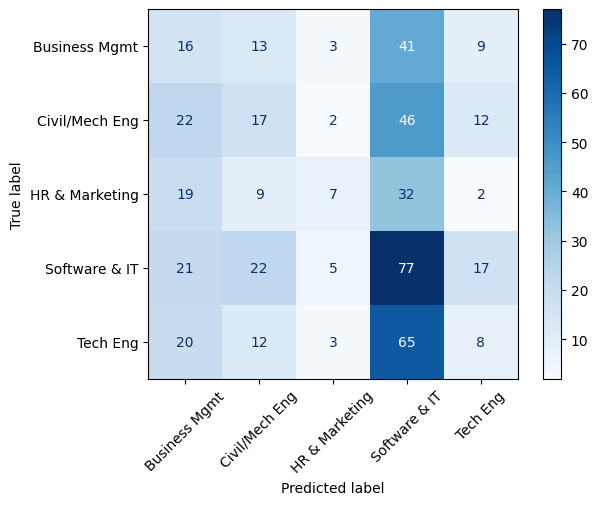

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Filter valid predictions if necessary
valid_indices = [i for i, p in enumerate(predictions) if p != "ERROR"]
y_true = [resume_sampled_df["label"][i] for i in valid_indices]
y_pred = [int(predictions[i]) for i in valid_indices]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Business Mgmt", "Civil/Mech Eng", "HR & Marketing", "Software & IT", "Tech Eng"
])
disp.plot(cmap="Blues", xticks_rotation=45)


### Few Shot Prompting
Instead of using the combined text resume we used for zero shot prompting and Bert, we are using the original dataset with columns and rows so it is eaiser to generate similar prompt that aligns with the Few Shot Prompting Examples

We also extract just the numerical prediction from the model’s response (0-4), which maps to one of the job categories.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Assume 'df' is already cleaned and ready
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['job_category'])

# 1. Train-Test Split for the original DataFrame
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# 2. Sample 100 resumes from the train set (preserving original features)
resume_sampled_df = df_train.sample(n=500, random_state=42).reset_index(drop=True)

# 3. Get the true labels
y_sampled = resume_sampled_df['label'].tolist()

In [19]:
few_shot_intro = (
    "Based on the following resume details, predict the job category from the following options:\n"
    "0: Business Management\n"
    "1: Civil and Mechanical Engineering\n"
    "2: HR & Marketing\n"
    "3: Software & IT\n"
    "4: Tech Engineering\n"
    "Answer with only the integer corresponding to the category.\n\n"

    "Example 1:\n"
    "Skills: Python, JavaScript (React), SQL, REST APIs, Git\n"
    "Degree: B.S. in Computer Science\n"
    "Positions: Full Stack Developer\n"
    "Certifications: AWS Certified Developer\n"
    "Answer: 3\n\n"

    "Example 2:\n"
    "Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps\n"
    "Degree: M.S. in Data Science\n"
    "Positions: Machine Learning Engineer\n"
    "Certifications: TensorFlow Developer Certificate\n"
    "Answer: 4\n\n"

    "Example 3:\n"
    "Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership\n"
    "Degree: MBA in Finance\n"
    "Positions: Business Analyst, Operations Manager\n"
    "Certifications: Certified Management Accountant (CMA)\n"
    "Answer: 0\n"

    "Example 4:\n"
    "Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift\n"
    "Degree: B.Tech in Data Engineering\n"
    "Positions: Data Engineer, Analytics Engineer\n"
    "Certifications: Google Cloud Professional Data Engineer\n"
    "Answer: 4\n"
)


In [20]:
import time
import pandas as pd
import re
from tqdm import tqdm  # Optional: nice progress bar

# Store cleaned predictions
predictions = []

# Optional: progress bar
for index, row in tqdm(resume_sampled_df.iterrows(), total=resume_sampled_df.shape[0]):
    # Combine all fields into a resume string
    resume_details = (
        f"Skills: {row.get('skills', '')}\n"
        f"{row.get('degree_names', '')}, {row.get('passing_years', '')}, {row.get('major_field_of_studies', '')}\n"
        f"Positions: {row.get('positions', '')}\n"
        f"Certifications: {row.get('certification_providers', '')} - {row.get('certification_skills', '')}\n"
    )

    # Construct full prompt
    prompt = few_shot_intro + "\nResume:\n" + resume_details + "\nAnswer:"
    MESSAGES = [{"role": "user", "content": prompt}]

    # Retry logic
    MAX_RETRIES = 5
    for attempt in range(1, MAX_RETRIES + 1):
        try:
            completion = client.chat.complete(
                model=MODEL,
                messages=MESSAGES
            )
            response = completion.choices[0].message.content.strip()
            break  # Success
        except Exception as e:
            print(f"[Row {index}] Attempt {attempt} failed: {e}")
            if attempt == MAX_RETRIES:
                predictions.append("ERROR")
                response = None
                break
            wait = 2 ** attempt
            print(f"Retrying in {wait} seconds...")
            time.sleep(wait)

    # Parse response only if available
    if response:
        print(f"\nPrompt:\n{prompt}\nResponse:\n{response}")
        match = re.search(r"\b([0-4])\b", response)
        if match:
            predictions.append(int(match.group(1)))
        else:
            print(f"Warning: Unexpected format at row {index}")
            predictions.append("ERROR")

    time.sleep(5)  # To avoid hitting rate limits


  0%|          | 0/500 [00:00<?, ?it/s]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  0%|          | 1/500 [00:05<43:52,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  0%|          | 2/500 [00:11<48:11,  5.81s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  1%|          | 3/500 [00:16<46:09,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  1%|          | 4/500 [00:22<45:37,  5.52s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  1%|          | 5/500 [00:27<45:07,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  1%|          | 6/500 [00:33<47:38,  5.79s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  1%|▏         | 7/500 [00:39<46:22,  5.64s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  2%|▏         | 8/500 [00:45<46:42,  5.70s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  2%|▏         | 9/500 [00:50<45:41,  5.58s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  2%|▏         | 10/500 [00:55<44:44,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  2%|▏         | 11/500 [01:01<44:32,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  2%|▏         | 12/500 [01:06<43:56,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  3%|▎         | 13/500 [01:11<43:43,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  3%|▎         | 14/500 [01:17<43:22,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  3%|▎         | 15/500 [01:22<42:59,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  3%|▎         | 16/500 [01:27<42:37,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  3%|▎         | 17/500 [01:32<42:51,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  4%|▎         | 18/500 [01:38<43:52,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  4%|▍         | 19/500 [01:44<43:36,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  4%|▍         | 20/500 [01:49<43:32,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  4%|▍         | 21/500 [01:55<44:00,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  4%|▍         | 22/500 [02:00<43:17,  5.43s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  5%|▍         | 23/500 [02:05<43:29,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  5%|▍         | 24/500 [02:11<43:15,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  5%|▌         | 25/500 [02:16<42:35,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  5%|▌         | 26/500 [02:21<42:10,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  5%|▌         | 27/500 [02:27<43:16,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  6%|▌         | 28/500 [02:33<43:01,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  6%|▌         | 29/500 [02:38<42:30,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  6%|▌         | 30/500 [02:43<42:05,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  6%|▌         | 31/500 [02:51<48:26,  6.20s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  6%|▋         | 32/500 [02:57<47:38,  6.11s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  7%|▋         | 33/500 [03:03<46:05,  5.92s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  7%|▋         | 34/500 [03:08<44:34,  5.74s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  7%|▋         | 35/500 [03:13<43:31,  5.62s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  7%|▋         | 36/500 [03:19<43:26,  5.62s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  7%|▋         | 37/500 [03:24<42:56,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  8%|▊         | 38/500 [03:30<42:16,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  8%|▊         | 39/500 [03:35<41:58,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  8%|▊         | 40/500 [03:40<41:37,  5.43s/it]

[Row 40] Attempt 1 failed: API error occurred: Status 429
{"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}
Retrying in 2 seconds...

Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finan

  8%|▊         | 41/500 [03:50<50:23,  6.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  8%|▊         | 42/500 [03:55<47:10,  6.18s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  9%|▊         | 43/500 [04:00<45:10,  5.93s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  9%|▉         | 44/500 [04:06<44:44,  5.89s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  9%|▉         | 45/500 [04:13<46:40,  6.15s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  9%|▉         | 46/500 [04:23<54:45,  7.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

  9%|▉         | 47/500 [04:28<50:11,  6.65s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 10%|▉         | 48/500 [04:33<47:30,  6.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 10%|▉         | 49/500 [04:39<45:09,  6.01s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 10%|█         | 50/500 [04:44<43:34,  5.81s/it]

[Row 50] Attempt 1 failed: API error occurred: Status 429
{"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}
Retrying in 2 seconds...
[Row 50] Attempt 2 failed: API error occurred: Status 429
{"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}
Retrying in 4 seconds...

Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. i

 10%|█         | 51/500 [04:56<56:34,  7.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 10%|█         | 52/500 [05:01<51:15,  6.87s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 11%|█         | 53/500 [05:06<47:53,  6.43s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 11%|█         | 54/500 [05:14<51:18,  6.90s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 11%|█         | 55/500 [05:20<47:35,  6.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 11%|█         | 56/500 [05:25<45:01,  6.09s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 11%|█▏        | 57/500 [05:31<44:07,  5.98s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 12%|█▏        | 58/500 [05:36<42:26,  5.76s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 12%|█▏        | 59/500 [05:43<45:43,  6.22s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 12%|█▏        | 60/500 [05:49<43:37,  5.95s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 12%|█▏        | 61/500 [05:54<42:25,  5.80s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 12%|█▏        | 62/500 [05:59<41:35,  5.70s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 13%|█▎        | 63/500 [06:05<40:37,  5.58s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 13%|█▎        | 64/500 [06:11<42:28,  5.84s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 13%|█▎        | 65/500 [06:17<41:27,  5.72s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 13%|█▎        | 66/500 [06:22<40:13,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 13%|█▎        | 67/500 [06:28<41:47,  5.79s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 14%|█▎        | 68/500 [06:33<40:27,  5.62s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 14%|█▍        | 69/500 [06:41<44:17,  6.17s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 14%|█▍        | 70/500 [06:46<42:18,  5.90s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 14%|█▍        | 71/500 [06:52<41:40,  5.83s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 14%|█▍        | 72/500 [06:57<40:19,  5.65s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 15%|█▍        | 73/500 [07:02<39:12,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 15%|█▍        | 74/500 [07:07<38:27,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 15%|█▌        | 75/500 [07:13<38:01,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 15%|█▌        | 76/500 [07:18<37:35,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 15%|█▌        | 77/500 [07:24<39:00,  5.53s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 16%|█▌        | 78/500 [07:34<47:37,  6.77s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 16%|█▌        | 79/500 [07:39<44:27,  6.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 16%|█▌        | 80/500 [07:44<42:03,  6.01s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 16%|█▌        | 81/500 [07:50<40:41,  5.83s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 16%|█▋        | 82/500 [07:55<39:20,  5.65s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 17%|█▋        | 83/500 [08:00<38:23,  5.52s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 17%|█▋        | 84/500 [08:05<37:42,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 17%|█▋        | 85/500 [08:11<37:15,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 17%|█▋        | 86/500 [08:16<36:48,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 17%|█▋        | 87/500 [08:21<36:39,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 18%|█▊        | 88/500 [08:26<36:24,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 18%|█▊        | 89/500 [08:32<37:31,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 18%|█▊        | 90/500 [08:38<37:32,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 18%|█▊        | 91/500 [08:43<37:12,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 18%|█▊        | 92/500 [08:49<38:33,  5.67s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 19%|█▊        | 93/500 [08:54<37:32,  5.54s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 19%|█▉        | 94/500 [09:00<37:04,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 19%|█▉        | 95/500 [09:05<36:27,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 19%|█▉        | 96/500 [09:10<36:00,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 19%|█▉        | 97/500 [09:16<36:06,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 20%|█▉        | 98/500 [09:21<36:20,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 20%|█▉        | 99/500 [09:27<36:13,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 20%|██        | 100/500 [09:32<36:27,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 20%|██        | 101/500 [09:38<37:11,  5.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 20%|██        | 102/500 [09:44<37:56,  5.72s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 21%|██        | 103/500 [09:49<36:51,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 21%|██        | 104/500 [09:55<36:03,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 21%|██        | 105/500 [10:00<35:38,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 21%|██        | 106/500 [10:05<35:12,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 21%|██▏       | 107/500 [10:10<34:59,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 22%|██▏       | 108/500 [10:16<34:45,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 22%|██▏       | 109/500 [10:21<34:32,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 22%|██▏       | 110/500 [10:26<34:24,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 22%|██▏       | 111/500 [10:31<34:09,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 22%|██▏       | 112/500 [10:37<34:05,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 23%|██▎       | 113/500 [10:42<33:51,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 23%|██▎       | 114/500 [10:47<33:41,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 23%|██▎       | 115/500 [10:53<34:56,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 23%|██▎       | 116/500 [10:58<34:40,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 23%|██▎       | 117/500 [11:04<35:32,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 24%|██▎       | 118/500 [11:10<34:46,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 24%|██▍       | 119/500 [11:15<34:17,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 24%|██▍       | 120/500 [11:20<33:47,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 24%|██▍       | 121/500 [11:25<33:27,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 24%|██▍       | 122/500 [11:30<33:13,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 25%|██▍       | 123/500 [11:36<33:14,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 25%|██▍       | 124/500 [11:41<33:01,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 25%|██▌       | 125/500 [11:46<32:50,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 25%|██▌       | 126/500 [11:51<32:47,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 25%|██▌       | 127/500 [11:57<32:37,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 26%|██▌       | 128/500 [12:03<33:55,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 26%|██▌       | 129/500 [12:08<33:26,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 26%|██▌       | 130/500 [12:13<32:58,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 26%|██▌       | 131/500 [12:18<32:43,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 26%|██▋       | 132/500 [12:24<32:39,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 27%|██▋       | 133/500 [12:29<33:20,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 27%|██▋       | 134/500 [12:35<32:48,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 27%|██▋       | 135/500 [12:40<32:23,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 27%|██▋       | 136/500 [12:45<32:06,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 27%|██▋       | 137/500 [12:50<31:56,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 28%|██▊       | 138/500 [12:56<32:03,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 28%|██▊       | 139/500 [13:01<31:47,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 28%|██▊       | 140/500 [13:06<31:30,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 28%|██▊       | 141/500 [13:11<31:23,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 28%|██▊       | 142/500 [13:17<32:41,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 29%|██▊       | 143/500 [13:23<32:08,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 29%|██▉       | 144/500 [13:28<31:43,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 29%|██▉       | 145/500 [13:33<31:21,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 29%|██▉       | 146/500 [13:38<31:10,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 29%|██▉       | 147/500 [13:43<31:00,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 30%|██▉       | 148/500 [13:49<30:50,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 30%|██▉       | 149/500 [13:54<30:40,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 30%|███       | 150/500 [13:59<30:33,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 30%|███       | 151/500 [14:04<30:25,  5.23s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 30%|███       | 152/500 [14:18<45:19,  7.82s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 31%|███       | 153/500 [14:24<41:13,  7.13s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 31%|███       | 154/500 [14:29<37:47,  6.55s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 31%|███       | 155/500 [14:34<35:19,  6.14s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 31%|███       | 156/500 [14:39<33:41,  5.88s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 31%|███▏      | 157/500 [14:45<32:31,  5.69s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 32%|███▏      | 158/500 [14:50<31:41,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 32%|███▏      | 159/500 [14:55<30:59,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 32%|███▏      | 160/500 [15:00<30:27,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 32%|███▏      | 161/500 [15:06<30:12,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 32%|███▏      | 162/500 [15:11<30:38,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 33%|███▎      | 163/500 [15:17<30:21,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 33%|███▎      | 164/500 [15:22<29:58,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 33%|███▎      | 165/500 [15:27<29:40,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 33%|███▎      | 166/500 [15:32<29:28,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 33%|███▎      | 167/500 [15:38<29:25,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 34%|███▎      | 168/500 [15:43<29:11,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 34%|███▍      | 169/500 [15:48<28:59,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 34%|███▍      | 170/500 [15:53<28:52,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 34%|███▍      | 171/500 [15:59<28:58,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 34%|███▍      | 172/500 [16:04<28:42,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 35%|███▍      | 173/500 [16:09<28:42,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 35%|███▍      | 174/500 [16:15<29:04,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 35%|███▌      | 175/500 [16:20<28:42,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 35%|███▌      | 176/500 [16:25<28:33,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 35%|███▌      | 177/500 [16:32<30:41,  5.70s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 36%|███▌      | 178/500 [16:37<29:54,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 36%|███▌      | 179/500 [16:42<29:15,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 36%|███▌      | 180/500 [16:48<29:17,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 36%|███▌      | 181/500 [16:53<28:47,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 36%|███▋      | 182/500 [16:58<28:24,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 37%|███▋      | 183/500 [17:04<28:09,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 37%|███▋      | 184/500 [17:09<28:00,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 37%|███▋      | 185/500 [17:14<27:47,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 37%|███▋      | 186/500 [17:19<27:36,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 37%|███▋      | 187/500 [17:25<27:35,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 38%|███▊      | 188/500 [17:31<28:50,  5.55s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 38%|███▊      | 189/500 [17:36<28:13,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 38%|███▊      | 190/500 [17:41<27:59,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 38%|███▊      | 191/500 [17:47<27:43,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 38%|███▊      | 192/500 [17:52<27:22,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 39%|███▊      | 193/500 [17:57<27:23,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 39%|███▉      | 194/500 [18:02<27:04,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 39%|███▉      | 195/500 [18:08<27:13,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 39%|███▉      | 196/500 [18:13<26:55,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 39%|███▉      | 197/500 [18:18<26:41,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 40%|███▉      | 198/500 [18:24<26:30,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 40%|███▉      | 199/500 [18:29<26:17,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 40%|████      | 200/500 [18:34<26:14,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 40%|████      | 201/500 [18:39<26:06,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 40%|████      | 202/500 [18:46<29:02,  5.85s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 41%|████      | 203/500 [18:52<28:14,  5.71s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 41%|████      | 204/500 [19:11<47:49,  9.69s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 41%|████      | 205/500 [19:16<41:01,  8.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 41%|████      | 206/500 [19:21<36:20,  7.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 41%|████▏     | 207/500 [19:27<33:03,  6.77s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 42%|████▏     | 208/500 [19:32<31:02,  6.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 42%|████▏     | 209/500 [19:37<29:19,  6.05s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 42%|████▏     | 210/500 [19:43<28:18,  5.86s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 42%|████▏     | 211/500 [19:48<27:23,  5.69s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 42%|████▏     | 212/500 [19:55<28:48,  6.00s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 43%|████▎     | 213/500 [20:00<27:39,  5.78s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 43%|████▎     | 214/500 [20:05<26:52,  5.64s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 43%|████▎     | 215/500 [20:11<26:18,  5.54s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 43%|████▎     | 216/500 [20:18<28:12,  5.96s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 43%|████▎     | 217/500 [20:23<27:11,  5.77s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 44%|████▎     | 218/500 [20:28<26:50,  5.71s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 44%|████▍     | 219/500 [20:36<29:34,  6.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 44%|████▍     | 220/500 [20:42<28:07,  6.03s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 44%|████▍     | 221/500 [20:47<27:00,  5.81s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 44%|████▍     | 222/500 [20:52<26:05,  5.63s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 45%|████▍     | 223/500 [20:57<25:29,  5.52s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 45%|████▍     | 224/500 [21:03<24:58,  5.43s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 45%|████▌     | 225/500 [21:08<24:35,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 45%|████▌     | 226/500 [21:13<24:20,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 45%|████▌     | 227/500 [21:18<24:21,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 46%|████▌     | 228/500 [21:24<24:08,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 46%|████▌     | 229/500 [21:30<26:05,  5.78s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 46%|████▌     | 230/500 [21:36<25:16,  5.62s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 46%|████▌     | 231/500 [21:41<24:39,  5.50s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 46%|████▋     | 232/500 [21:47<25:09,  5.63s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 47%|████▋     | 233/500 [21:52<24:53,  5.60s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 47%|████▋     | 234/500 [21:58<24:24,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 47%|████▋     | 235/500 [22:03<24:05,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 47%|████▋     | 236/500 [22:09<24:02,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 47%|████▋     | 237/500 [22:14<24:01,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 48%|████▊     | 238/500 [22:19<23:38,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 48%|████▊     | 239/500 [22:25<23:24,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 48%|████▊     | 240/500 [22:32<25:55,  5.98s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 48%|████▊     | 241/500 [22:37<24:46,  5.74s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 48%|████▊     | 242/500 [22:42<23:58,  5.57s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 49%|████▊     | 243/500 [22:48<23:28,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 49%|████▉     | 244/500 [22:53<22:59,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 49%|████▉     | 245/500 [22:58<22:44,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 49%|████▉     | 246/500 [23:03<22:27,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 49%|████▉     | 247/500 [23:08<22:14,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 50%|████▉     | 248/500 [23:14<22:16,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 50%|████▉     | 249/500 [23:19<22:08,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 50%|█████     | 250/500 [23:24<21:54,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 50%|█████     | 251/500 [23:30<22:32,  5.43s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 50%|█████     | 252/500 [23:36<22:30,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 51%|█████     | 253/500 [23:41<22:09,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 51%|█████     | 254/500 [23:46<22:10,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 51%|█████     | 255/500 [23:52<21:52,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 51%|█████     | 256/500 [23:57<21:35,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 51%|█████▏    | 257/500 [24:04<23:54,  5.90s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 52%|█████▏    | 258/500 [24:09<22:58,  5.70s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 52%|█████▏    | 259/500 [24:15<22:25,  5.58s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 52%|█████▏    | 260/500 [24:20<22:09,  5.54s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 52%|█████▏    | 261/500 [24:25<21:49,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 52%|█████▏    | 262/500 [24:32<22:42,  5.72s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 53%|█████▎    | 263/500 [24:37<22:04,  5.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 53%|█████▎    | 264/500 [24:42<21:33,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 53%|█████▎    | 265/500 [24:47<21:12,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 53%|█████▎    | 266/500 [24:53<20:53,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 53%|█████▎    | 267/500 [24:58<20:40,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 54%|█████▎    | 268/500 [25:03<20:29,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 54%|█████▍    | 269/500 [25:08<20:20,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 54%|█████▍    | 270/500 [25:14<20:12,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 54%|█████▍    | 271/500 [25:20<21:47,  5.71s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 54%|█████▍    | 272/500 [25:26<21:36,  5.68s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 55%|█████▍    | 273/500 [25:31<21:02,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 55%|█████▍    | 274/500 [25:36<20:32,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 55%|█████▌    | 275/500 [25:42<20:11,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 55%|█████▌    | 276/500 [25:47<19:54,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 55%|█████▌    | 277/500 [25:52<19:45,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 56%|█████▌    | 278/500 [25:57<19:33,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 56%|█████▌    | 279/500 [26:03<19:26,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 56%|█████▌    | 280/500 [26:09<20:07,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 56%|█████▌    | 281/500 [26:14<19:45,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 56%|█████▋    | 282/500 [26:19<19:27,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 57%|█████▋    | 283/500 [26:24<19:11,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 57%|█████▋    | 284/500 [26:29<18:59,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 57%|█████▋    | 285/500 [26:35<18:49,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 57%|█████▋    | 286/500 [26:40<19:14,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 57%|█████▋    | 287/500 [26:46<18:59,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 58%|█████▊    | 288/500 [26:51<18:48,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 58%|█████▊    | 289/500 [26:56<18:35,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 58%|█████▊    | 290/500 [27:01<18:25,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 58%|█████▊    | 291/500 [27:06<18:15,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 58%|█████▊    | 292/500 [27:12<18:06,  5.22s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 59%|█████▊    | 293/500 [27:17<18:00,  5.22s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 59%|█████▉    | 294/500 [27:22<17:54,  5.22s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 59%|█████▉    | 295/500 [27:27<18:01,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 59%|█████▉    | 296/500 [27:33<17:53,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 59%|█████▉    | 297/500 [27:38<18:16,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 60%|█████▉    | 298/500 [27:44<18:00,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 60%|█████▉    | 299/500 [27:49<17:54,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 60%|██████    | 300/500 [27:54<17:39,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 60%|██████    | 301/500 [27:59<17:29,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 60%|██████    | 302/500 [28:05<17:21,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 61%|██████    | 303/500 [28:10<17:13,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 61%|██████    | 304/500 [28:15<17:11,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 61%|██████    | 305/500 [28:20<17:03,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 61%|██████    | 306/500 [28:26<16:58,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 61%|██████▏   | 307/500 [28:31<17:10,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 62%|██████▏   | 308/500 [28:36<16:57,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 62%|██████▏   | 309/500 [28:42<17:26,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 62%|██████▏   | 310/500 [28:47<17:05,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 62%|██████▏   | 311/500 [28:53<16:56,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 62%|██████▏   | 312/500 [28:58<16:43,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 63%|██████▎   | 313/500 [29:07<19:58,  6.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 63%|██████▎   | 314/500 [29:12<18:46,  6.06s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 63%|██████▎   | 315/500 [29:17<17:56,  5.82s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 63%|██████▎   | 316/500 [29:23<17:18,  5.64s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 63%|██████▎   | 317/500 [29:28<16:49,  5.52s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 64%|██████▎   | 318/500 [29:33<16:31,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 64%|██████▍   | 319/500 [29:38<16:12,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 64%|██████▍   | 320/500 [29:44<16:04,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 64%|██████▍   | 321/500 [29:49<15:53,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 64%|██████▍   | 322/500 [29:54<15:45,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 65%|██████▍   | 323/500 [30:00<16:11,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 65%|██████▍   | 324/500 [30:05<15:52,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 65%|██████▌   | 325/500 [30:11<15:38,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 65%|██████▌   | 326/500 [30:16<15:25,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 65%|██████▌   | 327/500 [30:22<15:38,  5.43s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 66%|██████▌   | 328/500 [30:27<15:27,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 66%|██████▌   | 329/500 [30:32<15:13,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 66%|██████▌   | 330/500 [30:39<16:25,  5.80s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 66%|██████▌   | 331/500 [30:46<17:32,  6.23s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 66%|██████▋   | 332/500 [30:51<16:35,  5.93s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 67%|██████▋   | 333/500 [30:57<15:57,  5.74s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 67%|██████▋   | 334/500 [31:02<15:34,  5.63s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 67%|██████▋   | 335/500 [31:07<15:07,  5.50s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 67%|██████▋   | 336/500 [31:13<15:30,  5.68s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 67%|██████▋   | 337/500 [31:20<16:01,  5.90s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 68%|██████▊   | 338/500 [31:25<15:22,  5.69s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 68%|██████▊   | 339/500 [31:30<14:54,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 68%|██████▊   | 340/500 [31:35<14:32,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 68%|██████▊   | 341/500 [31:41<14:33,  5.49s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 68%|██████▊   | 342/500 [31:46<14:15,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 69%|██████▊   | 343/500 [31:51<13:59,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 69%|██████▉   | 344/500 [31:57<13:48,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 69%|██████▉   | 345/500 [32:02<13:40,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 69%|██████▉   | 346/500 [32:07<13:34,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 69%|██████▉   | 347/500 [32:12<13:24,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 70%|██████▉   | 348/500 [32:18<13:19,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 70%|██████▉   | 349/500 [32:23<13:12,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 70%|███████   | 350/500 [32:28<13:08,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 70%|███████   | 351/500 [32:33<13:07,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 70%|███████   | 352/500 [32:39<13:00,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 71%|███████   | 353/500 [32:44<12:51,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 71%|███████   | 354/500 [32:49<12:48,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 71%|███████   | 355/500 [32:54<12:41,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 71%|███████   | 356/500 [33:00<12:37,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 71%|███████▏  | 357/500 [33:05<12:44,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 72%|███████▏  | 358/500 [33:11<12:35,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 72%|███████▏  | 359/500 [33:16<12:27,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 72%|███████▏  | 360/500 [33:22<13:17,  5.70s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 72%|███████▏  | 361/500 [33:28<12:52,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 72%|███████▏  | 362/500 [33:33<12:33,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 73%|███████▎  | 363/500 [33:38<12:17,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 73%|███████▎  | 364/500 [33:44<12:19,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 73%|███████▎  | 365/500 [33:49<12:05,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 73%|███████▎  | 366/500 [33:54<11:55,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 73%|███████▎  | 367/500 [33:59<11:47,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 74%|███████▎  | 368/500 [34:05<11:36,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 74%|███████▍  | 369/500 [34:10<11:28,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 74%|███████▍  | 370/500 [34:15<11:29,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 74%|███████▍  | 371/500 [34:20<11:22,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 74%|███████▍  | 372/500 [34:26<11:21,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 75%|███████▍  | 373/500 [34:33<12:15,  5.79s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 75%|███████▍  | 374/500 [34:38<11:49,  5.63s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 75%|███████▌  | 375/500 [34:43<11:34,  5.56s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 75%|███████▌  | 376/500 [34:49<11:16,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 75%|███████▌  | 377/500 [34:54<11:02,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 76%|███████▌  | 378/500 [35:02<12:47,  6.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 76%|███████▌  | 379/500 [35:08<12:15,  6.08s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 76%|███████▌  | 380/500 [35:13<11:39,  5.83s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 76%|███████▌  | 381/500 [35:18<11:10,  5.64s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 76%|███████▋  | 382/500 [35:24<10:53,  5.54s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 77%|███████▋  | 383/500 [35:29<10:36,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 77%|███████▋  | 384/500 [35:35<10:57,  5.67s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 77%|███████▋  | 385/500 [35:40<10:43,  5.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 77%|███████▋  | 386/500 [35:46<10:24,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 77%|███████▋  | 387/500 [35:51<10:17,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 78%|███████▊  | 388/500 [35:56<10:03,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 78%|███████▊  | 389/500 [36:01<09:52,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 78%|███████▊  | 390/500 [36:08<10:32,  5.75s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 78%|███████▊  | 391/500 [36:14<10:15,  5.65s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 78%|███████▊  | 392/500 [36:19<10:04,  5.60s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 79%|███████▊  | 393/500 [36:24<09:48,  5.50s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 79%|███████▉  | 394/500 [36:30<09:36,  5.44s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 79%|███████▉  | 395/500 [36:35<09:29,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 79%|███████▉  | 396/500 [36:40<09:17,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 79%|███████▉  | 397/500 [36:46<09:09,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 80%|███████▉  | 398/500 [36:51<09:01,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 80%|███████▉  | 399/500 [36:56<08:53,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 80%|████████  | 400/500 [37:01<08:48,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 80%|████████  | 401/500 [37:06<08:40,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 80%|████████  | 402/500 [37:12<08:34,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 81%|████████  | 403/500 [37:17<08:29,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 81%|████████  | 404/500 [37:22<08:23,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 81%|████████  | 405/500 [37:28<08:25,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 81%|████████  | 406/500 [37:33<08:17,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 81%|████████▏ | 407/500 [37:38<08:11,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 82%|████████▏ | 408/500 [37:44<08:17,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 82%|████████▏ | 409/500 [37:49<08:06,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 82%|████████▏ | 410/500 [37:54<07:59,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 82%|████████▏ | 411/500 [38:00<07:51,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 82%|████████▏ | 412/500 [38:05<07:43,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 83%|████████▎ | 413/500 [38:10<07:36,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 83%|████████▎ | 414/500 [38:15<07:30,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 83%|████████▎ | 415/500 [38:21<07:47,  5.50s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 83%|████████▎ | 416/500 [38:27<07:38,  5.46s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 83%|████████▎ | 417/500 [38:32<07:27,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 84%|████████▎ | 418/500 [38:37<07:21,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 84%|████████▍ | 419/500 [38:42<07:11,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 84%|████████▍ | 420/500 [38:48<07:05,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 84%|████████▍ | 421/500 [38:53<07:06,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 84%|████████▍ | 422/500 [38:59<06:57,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 85%|████████▍ | 423/500 [39:04<07:03,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 85%|████████▍ | 424/500 [39:10<06:51,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 85%|████████▌ | 425/500 [39:15<06:42,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 85%|████████▌ | 426/500 [39:20<06:35,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 85%|████████▌ | 427/500 [39:25<06:28,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 86%|████████▌ | 428/500 [39:31<06:20,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 86%|████████▌ | 429/500 [39:36<06:14,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 86%|████████▌ | 430/500 [39:41<06:08,  5.26s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 86%|████████▌ | 431/500 [39:46<06:03,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 86%|████████▋ | 432/500 [39:52<05:57,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 87%|████████▋ | 433/500 [39:57<05:53,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 87%|████████▋ | 434/500 [40:03<06:01,  5.47s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 87%|████████▋ | 435/500 [40:08<05:50,  5.39s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 87%|████████▋ | 436/500 [40:14<05:52,  5.50s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 87%|████████▋ | 437/500 [40:19<05:41,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 88%|████████▊ | 438/500 [40:24<05:32,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 88%|████████▊ | 439/500 [40:30<05:24,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 88%|████████▊ | 440/500 [40:35<05:17,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 88%|████████▊ | 441/500 [40:40<05:16,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 88%|████████▊ | 442/500 [40:46<05:19,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 89%|████████▊ | 443/500 [40:52<05:18,  5.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 89%|████████▉ | 444/500 [40:57<05:08,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 89%|████████▉ | 445/500 [41:02<04:57,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 89%|████████▉ | 446/500 [41:08<04:48,  5.34s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 89%|████████▉ | 447/500 [41:13<04:40,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 90%|████████▉ | 448/500 [41:18<04:34,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 90%|████████▉ | 449/500 [41:23<04:30,  5.30s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 90%|█████████ | 450/500 [41:29<04:25,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 90%|█████████ | 451/500 [41:34<04:18,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 90%|█████████ | 452/500 [41:39<04:12,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 91%|█████████ | 453/500 [41:44<04:07,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 91%|█████████ | 454/500 [41:50<04:08,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 91%|█████████ | 455/500 [41:55<04:01,  5.37s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 91%|█████████ | 456/500 [42:01<03:55,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 91%|█████████▏| 457/500 [42:06<03:49,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 92%|█████████▏| 458/500 [42:11<03:43,  5.31s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 92%|█████████▏| 459/500 [42:17<03:39,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 92%|█████████▏| 460/500 [42:22<03:33,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 92%|█████████▏| 461/500 [42:27<03:26,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 92%|█████████▏| 462/500 [42:33<03:20,  5.28s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 93%|█████████▎| 463/500 [42:38<03:15,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 93%|█████████▎| 464/500 [42:43<03:09,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 93%|█████████▎| 465/500 [42:48<03:03,  5.25s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 93%|█████████▎| 466/500 [42:54<02:58,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 93%|█████████▎| 467/500 [42:59<02:52,  5.24s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 94%|█████████▎| 468/500 [43:05<02:56,  5.52s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 94%|█████████▍| 469/500 [43:11<02:51,  5.54s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 94%|█████████▍| 470/500 [43:16<02:43,  5.45s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 94%|█████████▍| 471/500 [43:21<02:36,  5.40s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 94%|█████████▍| 472/500 [43:26<02:29,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 95%|█████████▍| 473/500 [43:32<02:25,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 95%|█████████▍| 474/500 [43:37<02:18,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 95%|█████████▌| 475/500 [43:42<02:12,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 95%|█████████▌| 476/500 [43:47<02:06,  5.27s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 95%|█████████▌| 477/500 [43:54<02:08,  5.60s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 96%|█████████▌| 478/500 [43:59<02:00,  5.48s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 96%|█████████▌| 479/500 [44:08<02:18,  6.61s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 96%|█████████▌| 480/500 [44:14<02:04,  6.23s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 96%|█████████▌| 481/500 [44:19<01:53,  5.96s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 96%|█████████▋| 482/500 [44:24<01:43,  5.75s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 97%|█████████▋| 483/500 [44:29<01:34,  5.59s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 97%|█████████▋| 484/500 [44:35<01:28,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 97%|█████████▋| 485/500 [44:40<01:21,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 97%|█████████▋| 486/500 [44:45<01:15,  5.41s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 97%|█████████▋| 487/500 [44:50<01:09,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 98%|█████████▊| 488/500 [44:56<01:03,  5.33s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 98%|█████████▊| 489/500 [45:01<00:58,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 98%|█████████▊| 490/500 [45:06<00:53,  5.36s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 98%|█████████▊| 491/500 [45:13<00:50,  5.60s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 98%|█████████▊| 492/500 [45:18<00:44,  5.51s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 99%|█████████▊| 493/500 [45:23<00:37,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 99%|█████████▉| 494/500 [45:28<00:32,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 99%|█████████▉| 495/500 [45:34<00:26,  5.35s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 99%|█████████▉| 496/500 [45:39<00:21,  5.42s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

 99%|█████████▉| 497/500 [45:45<00:16,  5.38s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

100%|█████████▉| 498/500 [45:50<00:10,  5.32s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

100%|█████████▉| 499/500 [45:55<00:05,  5.29s/it]


Prompt:
Based on the following resume details, predict the job category from the following options:
0: Business Management
1: Civil and Mechanical Engineering
2: HR & Marketing
3: Software & IT
4: Tech Engineering
Answer with only the integer corresponding to the category.

Example 1:
Skills: Python, JavaScript (React), SQL, REST APIs, Git
Degree: B.S. in Computer Science
Positions: Full Stack Developer
Certifications: AWS Certified Developer
Answer: 3

Example 2:
Skills: Machine Learning, PyTorch, TensorFlow, Data Pipelines, AWS, DevOps, MLOps
Degree: M.S. in Data Science
Positions: Machine Learning Engineer
Certifications: TensorFlow Developer Certificate
Answer: 4

Example 3:
Skills: Financial Analysis, Forecasting, Budget Planning, Team Leadership
Degree: MBA in Finance
Positions: Business Analyst, Operations Manager
Certifications: Certified Management Accountant (CMA)
Answer: 0
Example 4:
Skills: Data Analysis, SQL, Big Data Pipelines, Airflow, AWS Redshift
Degree: B.Tech in Dat

100%|██████████| 500/500 [46:00<00:00,  5.52s/it]


In [21]:
print(predictions)

[0, 0, 0, 2, 1, 1, 4, 1, 1, 2, 2, 3, 4, 4, 0, 4, 3, 1, 0, 2, 4, 1, 4, 4, 4, 4, 3, 4, 0, 1, 0, 4, 0, 4, 2, 4, 4, 1, 1, 2, 4, 0, 1, 4, 0, 4, 4, 3, 3, 4, 0, 3, 4, 0, 3, 4, 4, 4, 0, 0, 0, 4, 3, 2, 1, 2, 0, 1, 4, 1, 4, 1, 3, 0, 4, 1, 4, 4, 0, 1, 3, 1, 4, 1, 2, 1, 1, 3, 4, 4, 2, 0, 4, 1, 4, 1, 4, 1, 4, 3, 4, 4, 1, 0, 0, 4, 2, 4, 0, 0, 3, 0, 4, 4, 4, 1, 3, 4, 1, 4, 4, 0, 2, 4, 0, 1, 1, 1, 0, 3, 0, 0, 0, 4, 4, 4, 1, 1, 3, 4, 3, 4, 1, 1, 4, 1, 0, 0, 3, 0, 2, 4, 4, 4, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 4, 3, 4, 1, 1, 4, 4, 4, 1, 2, 1, 1, 4, 4, 1, 1, 3, 4, 0, 4, 0, 0, 2, 0, 0, 0, 1, 1, 3, 2, 3, 2, 3, 4, 4, 3, 4, 2, 0, 1, 1, 1, 4, 1, 1, 4, 4, 0, 1, 0, 4, 4, 0, 4, 1, 1, 2, 1, 4, 0, 2, 2, 4, 3, 4, 1, 1, 3, 4, 4, 3, 1, 4, 3, 0, 4, 2, 1, 2, 4, 3, 3, 4, 3, 4, 4, 1, 0, 4, 4, 4, 4, 4, 3, 4, 0, 1, 4, 1, 1, 4, 0, 4, 0, 0, 4, 3, 3, 4, 4, 0, 1, 3, 4, 2, 4, 3, 0, 4, 3, 4, 3, 0, 1, 4, 0, 2, 0, 4, 2, 4, 0, 1, 3, 4, 1, 4, 4, 1, 3, 0, 1, 4, 4, 1, 4, 3, 3, 3, 0, 4, 2, 0, 4, 1, 2, 0, 4, 0, 2, 4, 1, 1, 0, 0, 1, 3, 1, 

In [22]:
from sklearn.metrics import classification_report

# Step 1: Select only valid predictions
valid_indices = [i for i, pred in enumerate(predictions) if pred != "ERROR"]

# Step 2: Extract cleaned predictions and true labels
npredictions = [int(predictions[i]) for i in valid_indices]
y_true = [resume_sampled_df["label"].iloc[i] for i in valid_indices]

# Step 3: Print classification report
print(classification_report(npredictions, y_true))


              precision    recall  f1-score   support

           0       0.25      0.18      0.21        98
           1       0.25      0.23      0.24       118
           2       0.07      0.11      0.08        37
           3       0.17      0.35      0.23        74
           4       0.38      0.23      0.28       173

    accuracy                           0.23       500
   macro avg       0.22      0.22      0.21       500
weighted avg       0.27      0.23      0.24       500



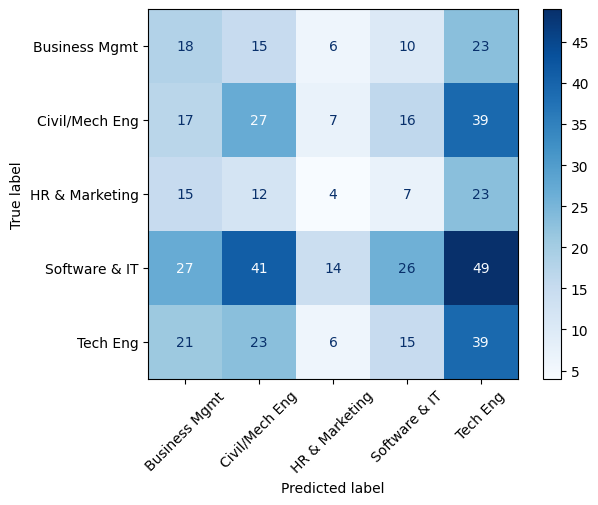

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Filter valid predictions if necessary
valid_indices = [i for i, p in enumerate(predictions) if p != "ERROR"]
y_true = [resume_sampled_df["label"][i] for i in valid_indices]
y_pred = [int(predictions[i]) for i in valid_indices]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Business Mgmt", "Civil/Mech Eng", "HR & Marketing", "Software & IT", "Tech Eng"
])
disp.plot(cmap="Blues", xticks_rotation=45)
